In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [2]:
import numpy as np

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    ref. https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
    
    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [3]:
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

In [4]:
df = pd.read_csv('../temp/output_feature/clean_data_train.csv')
df_future = pd.read_csv('../temp_future/output_feature/clean_data_future_train.csv')

In [5]:
corr_matrix = df_future.corr()

(<matplotlib.image.AxesImage at 0x7f5506b5ffd0>,
 <matplotlib.colorbar.Colorbar at 0x7f5506b90550>)

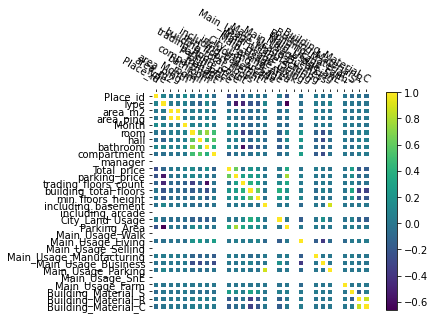

In [6]:
heatmap(corr_matrix.iloc[:30, range(30)], col_labels=corr_matrix.columns[:30], row_labels=corr_matrix.columns[:30])

In [7]:
# [TODO] drop data
# After merging the output features, there is no any
# building built with the stone, so it is
# a redundant feature now
print(df['Building_Material_stone'].unique())
print(df_future['Building_Material_stone'].unique())

[0]
[0]


In [8]:
corr_matrix_future = df_future.corr()

In [9]:
# However, the dimension of corr_matrix of data is
# extremely large (more than 10,000 entries in total)
# [Question] Is there any efficiently to handle such corr_matrix?
corr_matrix.shape

(67, 67)

In [10]:
# Prepare the data to plot the scatter plot for each columns
to_drop_columns = ['Place_id', 'Type', 'manager', 'Month', 'area_m2', 'including_arcade',
                   'City_Land_Usage', 'Non_City_Land_Usage', 'Main_Usage_Selling',
                   'Main_Usage_Manufacturing', 'Main_Usage_Business',
                   'Main_Usage_Parking', 'Main_Usage_SnE', 'Main_Usage_Farm',
                   'Building_Material_S', 'Building_Material_R', 'Building_Material_C',
                   'Building_Material_steel', 'Building_Material_stone',
                   'Building_Material_B', 'Building_Material_W', 'Building_Material_iron',
                   'Building_Material_tile', 'Building_Material_clay',
                   'Building_Material_RC_reinforce']

df_future.drop(columns=to_drop_columns, inplace=True)
df_future = df_future.loc[df_future['Main_Usage_Living'] == 1]
df_future = df_future[df_future['Main_Usage_Living'] == 1]
df_future = df_future.loc[df_future['room'] < 6]
df_future = df_future.loc[df_future['trading_floors_count'] == 1]
df_future = df_future.loc[df['including_basement'] == 0]

In [11]:
numeric_df_future = df_future.select_dtypes(include=np.number)
numeric_columns = numeric_df_future.columns
print(numeric_columns)

# They are the same value
# df_future['including_arcade'].value_counts()

# What does amt million mean?
# print(df_future['amt_millon'].value_counts())

Index(['area_ping', 'room', 'hall', 'bathroom', 'compartment', 'Total_price',
       'parking_price', 'trading_floors_count', 'building_total_floors',
       'min_floors_height', 'including_basement', 'Parking_Area',
       'Main_Usage_Walk', 'Main_Usage_Living', 'Parking_Space_Types',
       'Building_Types', 'Unit_Price_Ping', 'Transfer_Total_Ping', 'Month_raw',
       'CPI', 'CPI_rate', 'unemployment rate', 'Pain_index_3month',
       'ppen_price', 'high_price', 'low_price', 'close_price', 'qmatch',
       'amt_millon', 'return_rate_month', 'Turnover_rate_month',
       'outstanding_share_thousand', 'Capitalization_million',
       'excess total _ million_usdollars', 'import_price_index_usdollars',
       'export_price_index_usdollars', 'export_million_usdollars',
       'import_million_usdollars', 'survival_mobility_rate',
       'live_deposit_mobility_interest_rate', 'CCI_3month',
       'construction_engineering_index'],
      dtype='object')


array([[<AxesSubplot:title={'center':'area_ping'}>,
        <AxesSubplot:title={'center':'room'}>,
        <AxesSubplot:title={'center':'hall'}>,
        <AxesSubplot:title={'center':'bathroom'}>,
        <AxesSubplot:title={'center':'compartment'}>,
        <AxesSubplot:title={'center':'Total_price'}>],
       [<AxesSubplot:title={'center':'parking_price'}>,
        <AxesSubplot:title={'center':'trading_floors_count'}>,
        <AxesSubplot:title={'center':'building_total_floors'}>,
        <AxesSubplot:title={'center':'min_floors_height'}>,
        <AxesSubplot:title={'center':'including_basement'}>,
        <AxesSubplot:title={'center':'Parking_Area'}>],
       [<AxesSubplot:title={'center':'Main_Usage_Walk'}>,
        <AxesSubplot:title={'center':'Main_Usage_Living'}>,
        <AxesSubplot:title={'center':'Parking_Space_Types'}>,
        <AxesSubplot:title={'center':'Building_Types'}>,
        <AxesSubplot:title={'center':'Unit_Price_Ping'}>,
        <AxesSubplot:title={'center':'T

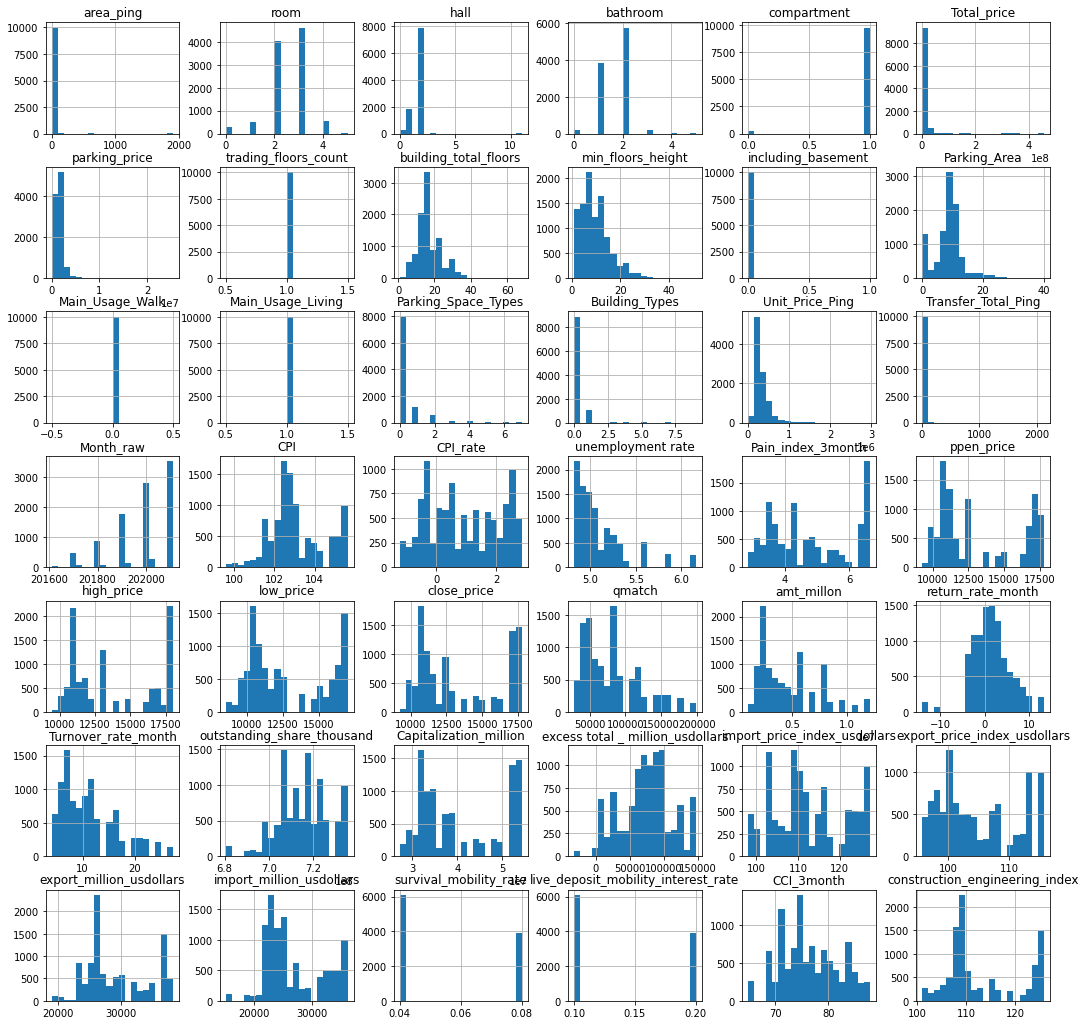

In [12]:
# Plotting the histogram of numeric features
# to explore their distribution.
# If it is not Gaussian(like heavy tailed), then
# we need to do data transformation and scaling
# before putting into the Machine Learning algorithms.
# It takes many time to run this block,
# even though we just use 10,000 points
# [Discussion]
# Do we need to clean the features or specify
# the dtype that are not in the real value? 
# for avoiding filter the real numeric features by hand.
import random

indices = random.sample(range(df_future.shape[0]), 10000)
sub_sample_future = df_future[numeric_columns].iloc[indices]
fig, axis = plt.subplots(7, 6, figsize=(18, 18))
sub_sample_future.hist(ax=axis, bins=20)

/home/elichen/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/elichen/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/elichen/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/elichen/anaconda3/envs/py310/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automati

array([[<AxesSubplot:xlabel='area_ping', ylabel='area_ping'>,
        <AxesSubplot:xlabel='room', ylabel='area_ping'>,
        <AxesSubplot:xlabel='hall', ylabel='area_ping'>, ...,
        <AxesSubplot:xlabel='live_deposit_mobility_interest_rate', ylabel='area_ping'>,
        <AxesSubplot:xlabel='CCI_3month', ylabel='area_ping'>,
        <AxesSubplot:xlabel='construction_engineering_index', ylabel='area_ping'>],
       [<AxesSubplot:xlabel='area_ping', ylabel='room'>,
        <AxesSubplot:xlabel='room', ylabel='room'>,
        <AxesSubplot:xlabel='hall', ylabel='room'>, ...,
        <AxesSubplot:xlabel='live_deposit_mobility_interest_rate', ylabel='room'>,
        <AxesSubplot:xlabel='CCI_3month', ylabel='room'>,
        <AxesSubplot:xlabel='construction_engineering_index', ylabel='room'>],
       [<AxesSubplot:xlabel='area_ping', ylabel='hall'>,
        <AxesSubplot:xlabel='room', ylabel='hall'>,
        <AxesSubplot:xlabel='hall', ylabel='hall'>, ...,
        <AxesSubplot:xlabel='liv

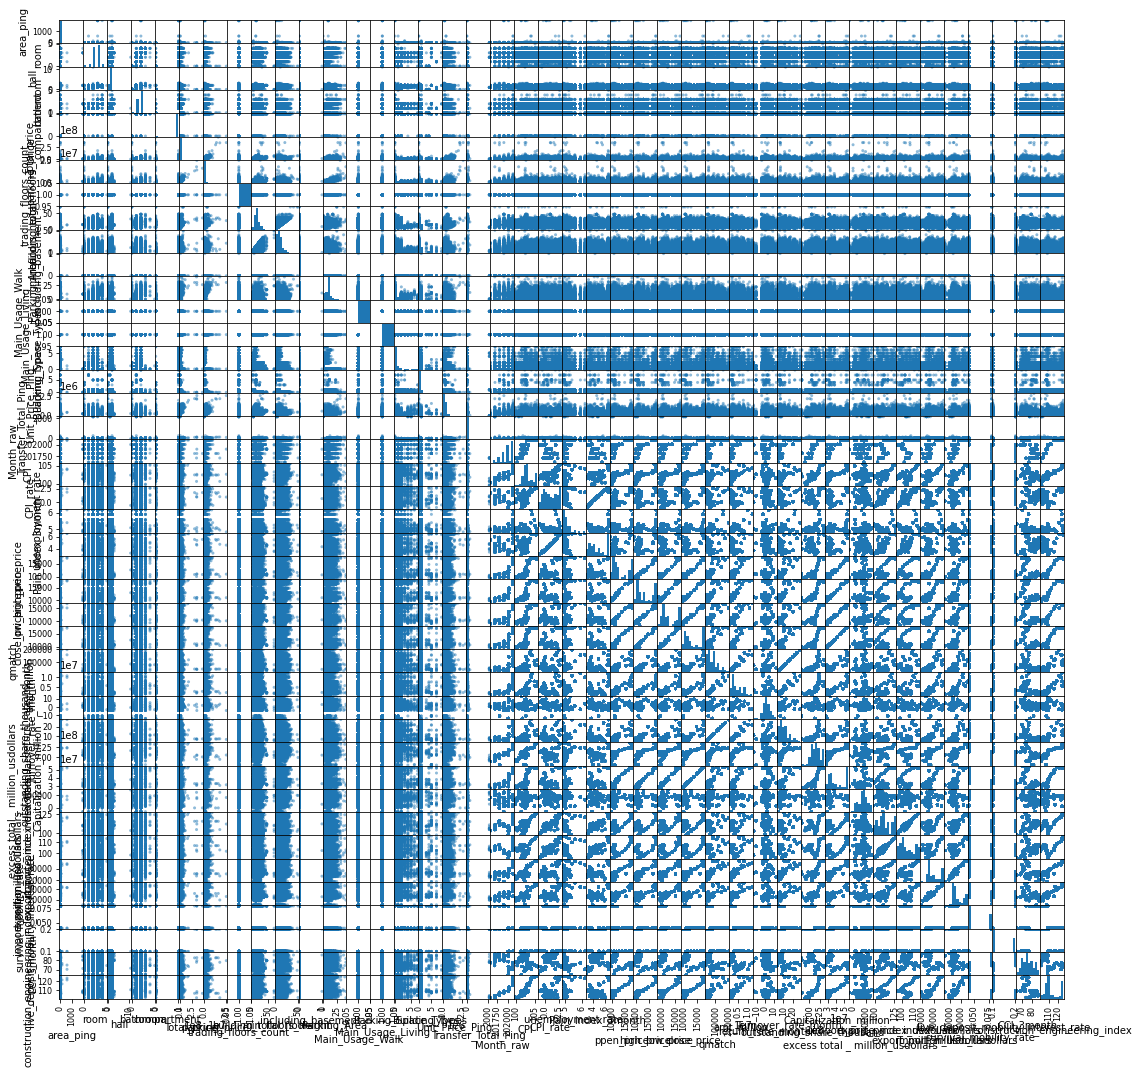

In [13]:
scatter_matrix(sub_sample_future, figsize=(18, 18))